In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x_data = np.array([0.27, 0.35, 0.44, 0.58, 0.66, 0.77, 0.4, 0.32, 0.20, 0.15, 0.08])

In [0]:
def AF(x): #Activation Function
    if x < 0:
        return 0
    elif x >= 2:
        return 2
    else:
        return x

HyperParameters :=> R1:  1 , R2:  3 , T_Max :  10
################################################
Epoch 3 ===> [ 0.000  0.016  0.000  0.113  0.451  0.328  0.099  0.000  0.000  0.000
  0.000]
******************************
Epoch 4 ===> [ 0.000  0.000  0.000  0.117  0.478  0.470  0.000  0.000  0.000  0.000
  0.000]
******************************
Epoch 5 ===> [ 0.000  0.000  0.000  0.122  0.639  0.510  0.000  0.000  0.000  0.000
  0.000]
******************************
Epoch 6 ===> [ 0.000  0.000  0.000  0.201  0.763  0.629  0.000  0.000  0.000  0.000
  0.000]
******************************
Epoch 7 ===> [ 0.000  0.000  0.000  0.264  0.955  0.734  0.000  0.000  0.000  0.000
  0.000]
******************************
Epoch 8 ===> [ 0.000  0.000  0.000  0.364  1.172  0.882  0.000  0.000  0.000  0.000
  0.000]
******************************
Epoch 9 ===> [ 0.000  0.000  0.000  0.481  1.451  1.050  0.000  0.000  0.000  0.000
  0.000]
******************************
Epoch 10 ===> [ 0.000  0.000  0.0

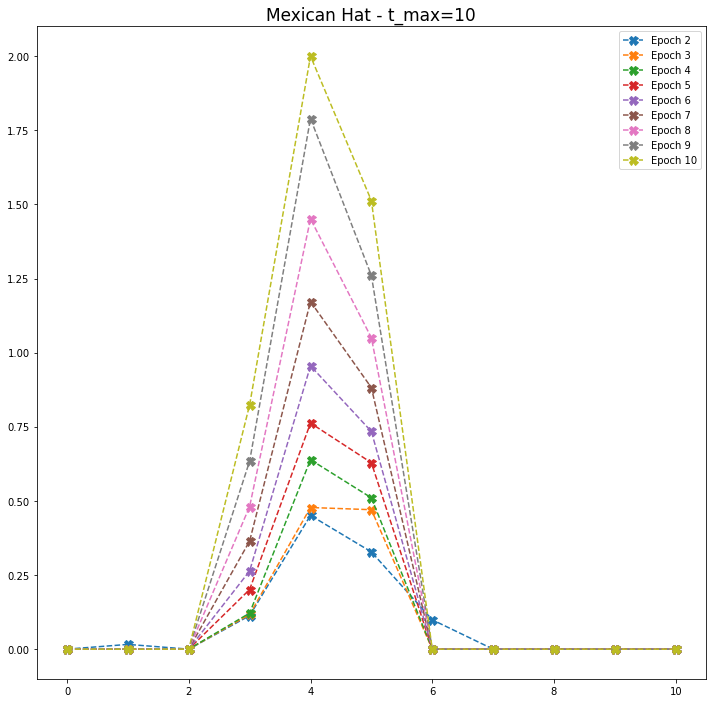

In [27]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

def find_place(itr, R1, R2, length):
    k1_1 = itr - R1
    k1_2 = itr + R1

    k2_1 = itr - R2
    k2_2 = itr + R2

    if k1_1 < 0:
        k1_1 = 0

    if k2_1 < 0:
        k2_1 = 0

    if k1_2 >= length:
        k1_2 = length - 1

    if k2_2 >= length:
        k2_2 = length - 1

    return k1_1, k1_2, k2_1, k2_2

def MexicianHat(data=x_data, C1=0.6, C2=-0.4, R1=2, R2=4, t_max=5):
    f, ax = plt.subplots(1, 1, figsize=(12, 12))
    print("HyperParameters :=> R1: ",R1, ", R2: ", R2, ", T_Max : ", t_max)
    print("################################################")
    x = data.copy()
    x_old = x.copy()
    t = 1
    x_length = len(data)
    while t < t_max:
        for i in range(0, x_length):
            k1_1, k1_2, k2_1, k2_2 = find_place(itr=i, R1=R1, R2=R2, length=x_length)
            sum1 = 0
            for j in range(k1_1, k1_2+1):
                sum1 += x_old[j]
            sum2 = 0
            for j in range(k2_1, k1_1):
                sum2 += x_old[j]
            sum3 = 0
            for j in range(k1_2+1, k2_2+1):
                sum3 += x_old[j]
            x[i] = AF((C1 * sum1) + (C2 * sum2) + (C2 * sum3))

        x_old = x.copy()
        t+=1
        print("Epoch {0} ===> {1}".format(t+1, x))
        print("******************************")
        b = x.ravel()
        plt.plot(b, label="Epoch {0}".format(t), marker="X", drawstyle='default', linestyle='--', markersize=9)
        
    plt.legend()
    plt.title("Mexican Hat - t_max=10", fontsize=17)
    plt.show()

MexicianHat(data=x_data, C1=0.6, C2=-0.5, R1=1, R2=3, t_max=10)